# Synthetic Fraud Analysis and Prediction

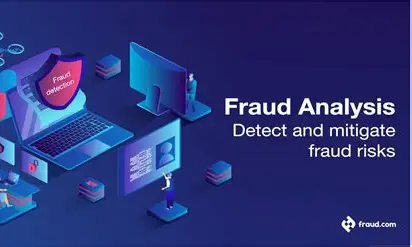

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Data Loading and Understanding

In [2]:
df = pd.read_csv('synthetic_fraud_dataset.csv')
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [3]:
def data_understanding(df):
    # Display the information of the dataset
    print('Dataset info:')
    print(df.info())
    print('\n:')

    # Display the datatypes of the columns in the dataset
    print('Datatypes of the columns:')
    print(df.dtypes)
    print('\n:')

    # Checking for missing values
    print('Checking for missing values:')
    print(df.isnull().sum())
    print('\n:')

    # Check for duplicates in the dataset
    print('Checking for duplicates:')
    print(f'The Dataset has {df.duplicated().sum()} duplicates')
    print('\n:')

    # Display the Numerical statistics of the dataset
    print('Numerical description:')
    print(df.describe(exclude='object'))
    print('\n:')

    # Display the categoracal statistics of the dataset
    print('Categorical description:')
    print(df.describe(include='object'))
    print('\n:')

    # Check the distribution of the target variable
    if 'Fraud_Label' in df.columns:
        print('Distribution of Target Variable:')
        print(df['Fraud_Label'].value_counts())
        print('\n:')

df_copy = df.copy()
data_understanding(df_copy)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  

### Data Wrangling

In [4]:
# Changing the Timestamp column to a date-time data type
df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'])
df_copy.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [5]:
# Dropping the Transaction_ID and User_ID columns as they have no use on the model
df_copy.drop(['Transaction_ID', 'User_ID'], axis=1, inplace=True)

In [6]:
# Leaving all features in lower case
df_copy.columns = df_copy.columns.str.lower()
df_copy.head()

,transaction_amount,transaction_type,timestamp,account_balance,device_type,location,merchant_category,ip_address_flag,previous_fraudulent_activity,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age,transaction_distance,authentication_method,risk_score,is_weekend,fraud_label
0,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [7]:
# Splitting the timestamp column into date and time separate columns
df_copy['year'] = df_copy['timestamp'].dt.year
df_copy['month'] = df_copy['timestamp'].dt.month
df_copy['day'] = df_copy['timestamp'].dt.day
df_copy['hour'] = df_copy['timestamp'].dt.hour
df_copy['minutes'] = df_copy['timestamp'].dt.minute
df_copy['second'] = df_copy['timestamp'].dt.second
df_copy.head(2)

,transaction_amount,transaction_type,timestamp,account_balance,device_type,location,merchant_category,ip_address_flag,previous_fraudulent_activity,daily_transaction_count,...,authentication_method,risk_score,is_weekend,fraud_label,year,month,day,hour,minutes,second
0,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,...,Biometric,0.8494,0,0,2023,8,14,19,30,0
1,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,...,Password,0.0959,0,1,2023,6,7,4,1,0


In [8]:
cols_to_clean = ['transaction_amount', 'transaction_type', 'timestamp',
       'account_balance', 'device_type', 'location', 'merchant_category',
       'ip_address_flag', 'previous_fraudulent_activity',
       'daily_transaction_count', 'avg_transaction_amount_7d',
       'failed_transaction_count_7d', 'card_type', 'card_age',
       'transaction_distance', 'authentication_method', 'risk_score',
       'is_weekend', 'fraud_label', 'date', 'time']

In [9]:
# Checking to see if there are extra ?, nan or NaN in the dataset
for col in cols_to_clean:
    if col in df_copy.columns:
        print(f"{col}: '?' count = {(df_copy[col] == '?').sum()}, 'nan' count = {(df_copy[col] == 'nan').sum()}, 'NaN' count = {(df_copy[col] == 'Nan').sum()}")

transaction_amount: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
transaction_type: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
timestamp: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
account_balance: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
device_type: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
location: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
merchant_category: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
ip_address_flag: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
previous_fraudulent_activity: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
daily_transaction_count: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
avg_transaction_amount_7d: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
failed_transaction_count_7d: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
card_type: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
card_age: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
transaction_distance: '?' count = 0, 'nan' count = 0, 'NaN' count = 0
a

### EDA

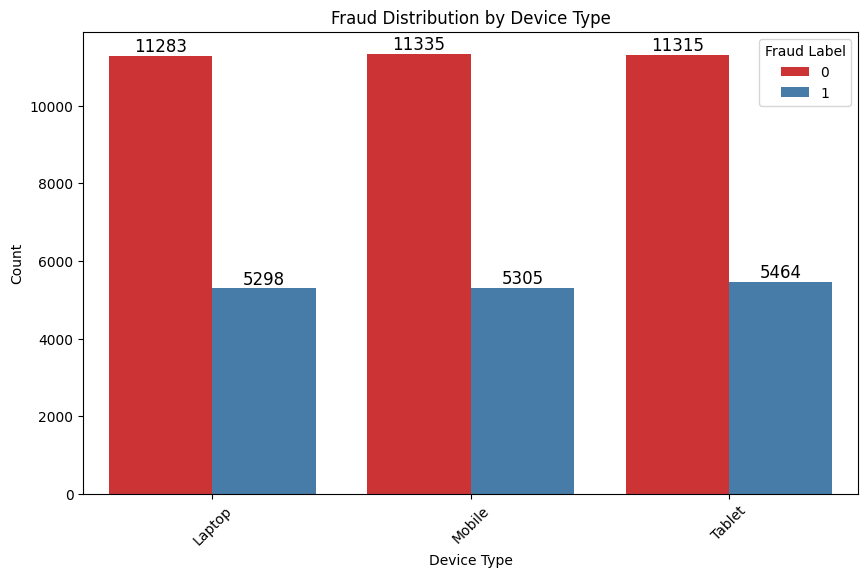

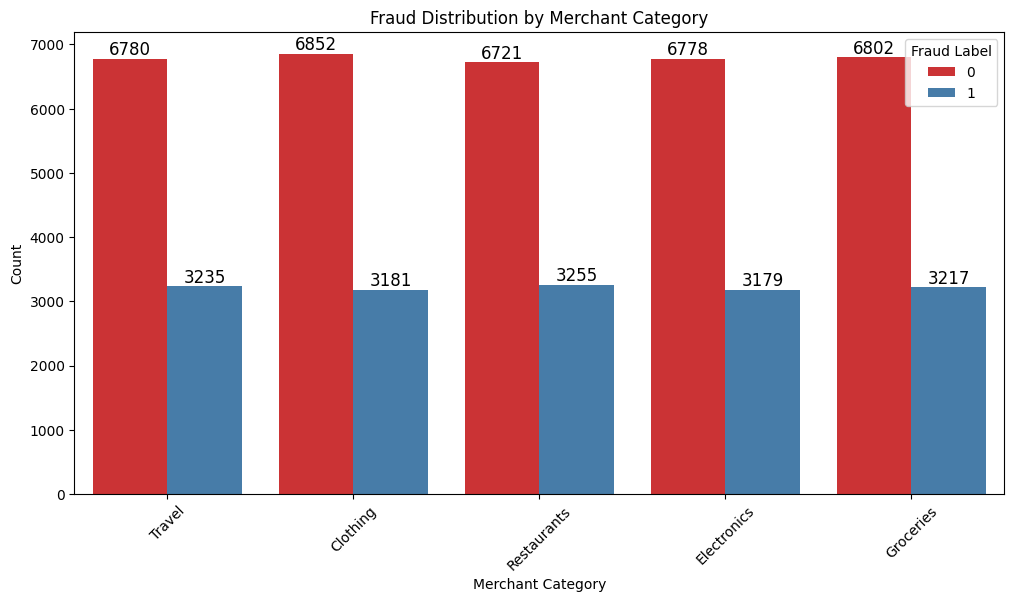

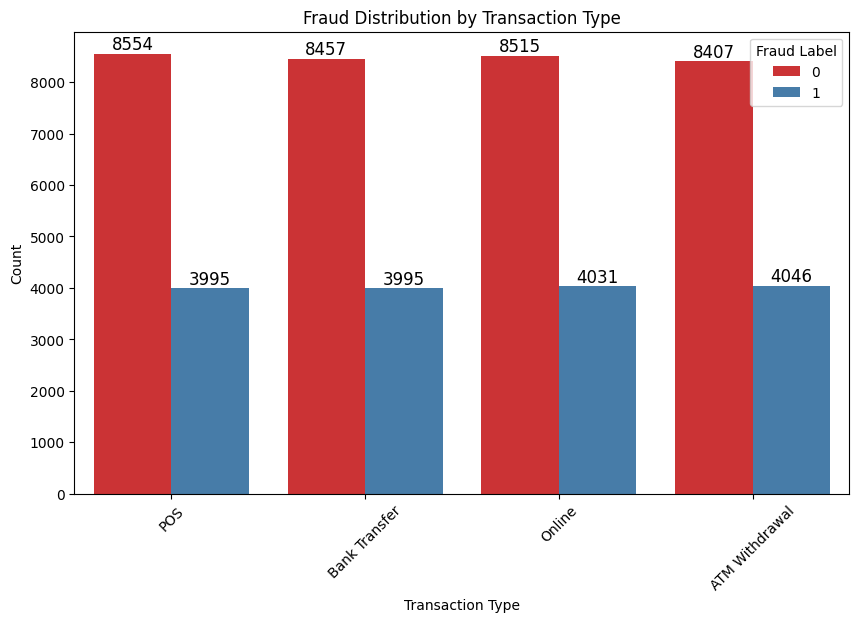

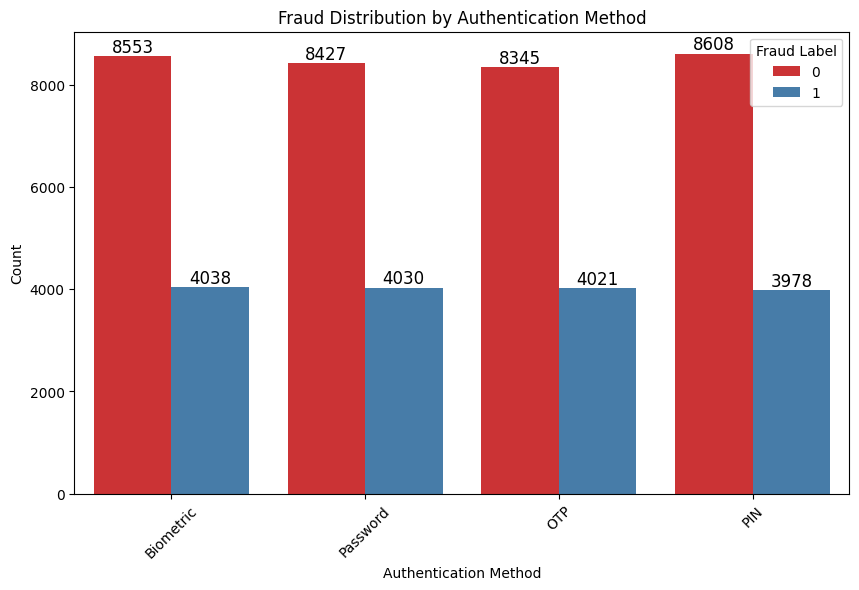

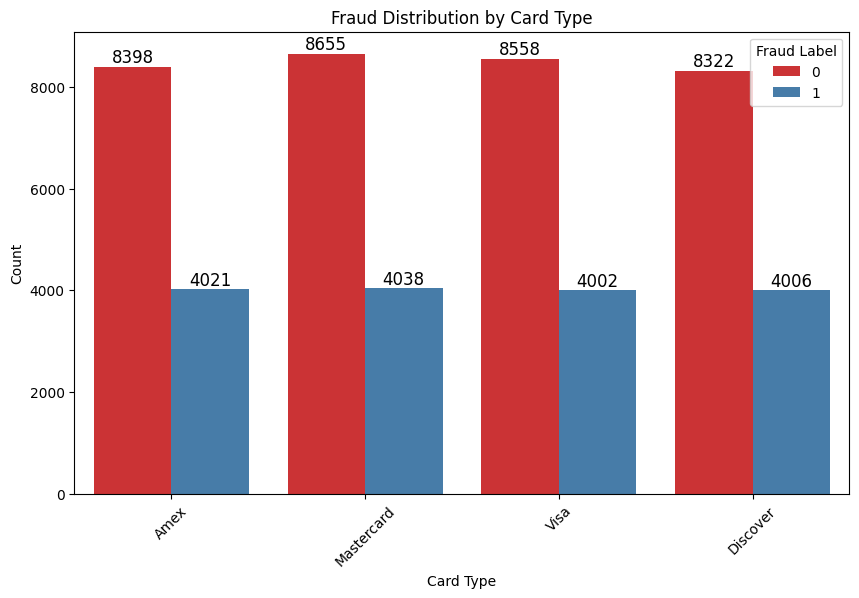

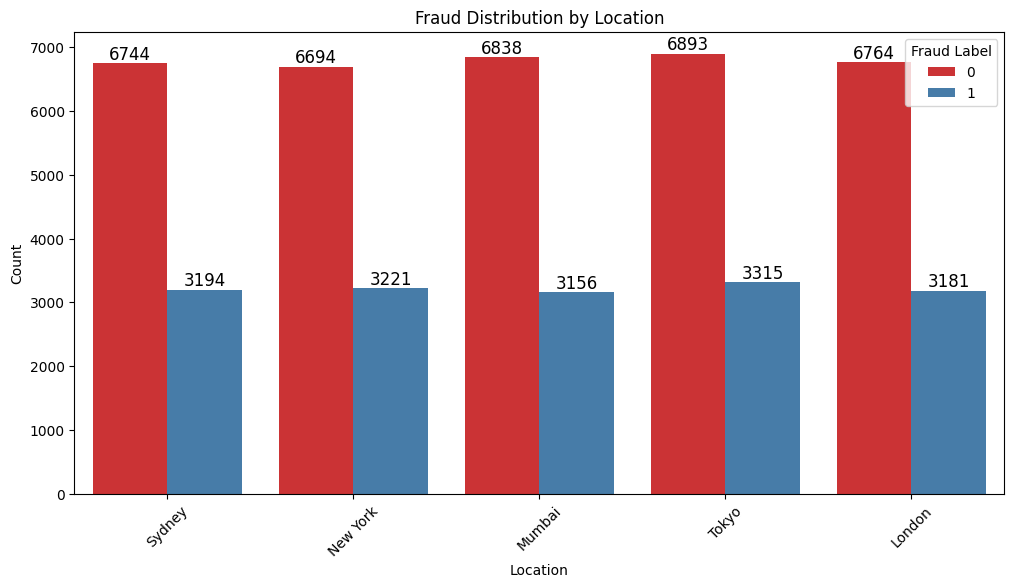

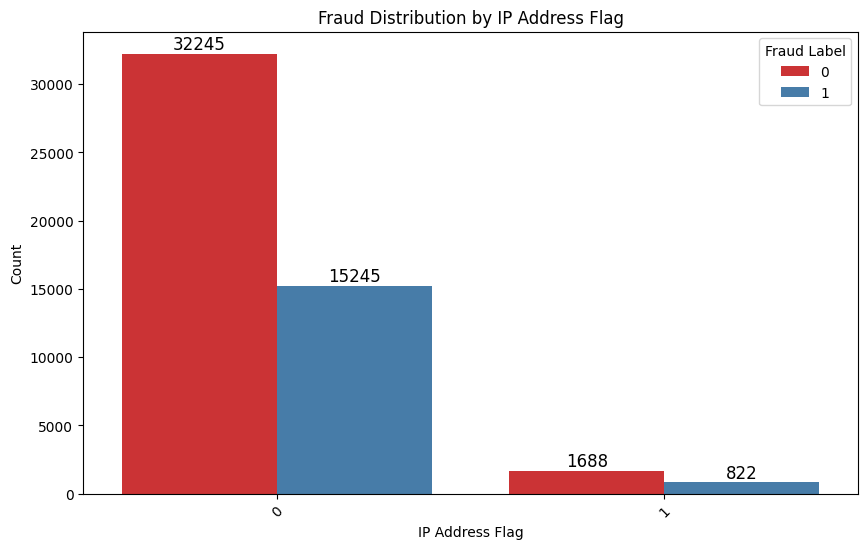

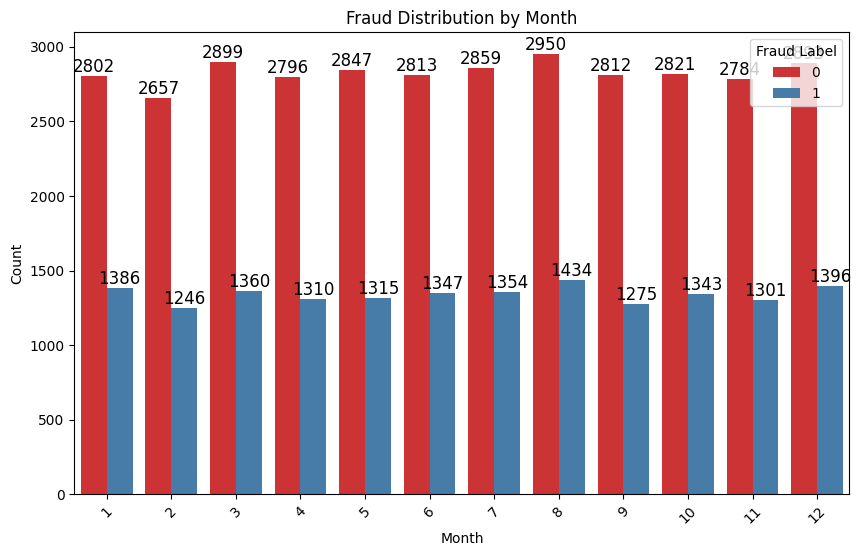

In [10]:
# Checking for which device_type has the most number of frauds
def plot_device_type_fraud(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='device_type', hue='fraud_label', palette='Set1')
    plt.title('Fraud Distribution by Device Type')
    for container in plt.gca().containers:
        plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
    plt.xlabel('Device Type')
    plt.ylabel('Count')
    plt.legend(title='Fraud Label', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()
plot_device_type_fraud(df_copy)

# Checking for which merchant_category has the most number of frauds
def plot_merchant_category_fraud(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='merchant_category', hue='fraud_label', palette='Set1')
    plt.title('Fraud Distribution by Merchant Category')
    for container in plt.gca().containers:
        plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
    plt.xlabel('Merchant Category')
    plt.ylabel('Count')
    plt.legend(title='Fraud Label', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()
plot_merchant_category_fraud(df_copy)

# Checking for which transaction_type has the most number of frauds
def plot_transaction_type_fraud(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='transaction_type', hue='fraud_label', palette='Set1')
    plt.title('Fraud Distribution by Transaction Type')
    for container in plt.gca().containers:
        plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.legend(title='Fraud Label', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()
plot_transaction_type_fraud(df_copy)

# Checking for which authentication_method has the most number of frauds
def plot_authentication_method_fraud(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='authentication_method', hue='fraud_label', palette='Set1')
    plt.title('Fraud Distribution by Authentication Method')
    for container in plt.gca().containers:
        plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
    plt.xlabel('Authentication Method')
    plt.ylabel('Count')
    plt.legend(title='Fraud Label', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()
plot_authentication_method_fraud(df_copy)

# Checking for which card_type has the most number of frauds
def plot_card_type_fraud(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='card_type', hue='fraud_label', palette='Set1')
    plt.title('Fraud Distribution by Card Type')
    for container in plt.gca().containers:
        plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
    plt.xlabel('Card Type')
    plt.ylabel('Count')
    plt.legend(title='Fraud Label', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()
plot_card_type_fraud(df_copy)

# checking for which location has the most number of frauds
def plot_location_fraud(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='location', hue='fraud_label', palette='Set1')
    plt.title('Fraud Distribution by Location')
    for container in plt.gca().containers:
        plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
    plt.xlabel('Location')
    plt.ylabel('Count')
    plt.legend(title='Fraud Label', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()
plot_location_fraud(df_copy)

# Checking for which ip_address_flag has the most number of frauds
def plot_ip_address_flag_fraud(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='ip_address_flag', hue='fraud_label', palette='Set1')
    plt.title('Fraud Distribution by IP Address Flag')
    for container in plt.gca().containers:
        plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
    plt.xlabel('IP Address Flag')
    plt.ylabel('Count')
    plt.legend(title='Fraud Label', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()
plot_ip_address_flag_fraud(df_copy)

# checking which month has the most number of frauds
def plot_month_fraud(df):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='month', hue='fraud_label', palette='Set1')
    plt.title('Fraud Distribution by Month')
    for container in plt.gca().containers:
        plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.legend(title='Fraud Label', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()
plot_month_fraud(df_copy)

Ratio of fraudulent transactions that happened on weekends: 0.30


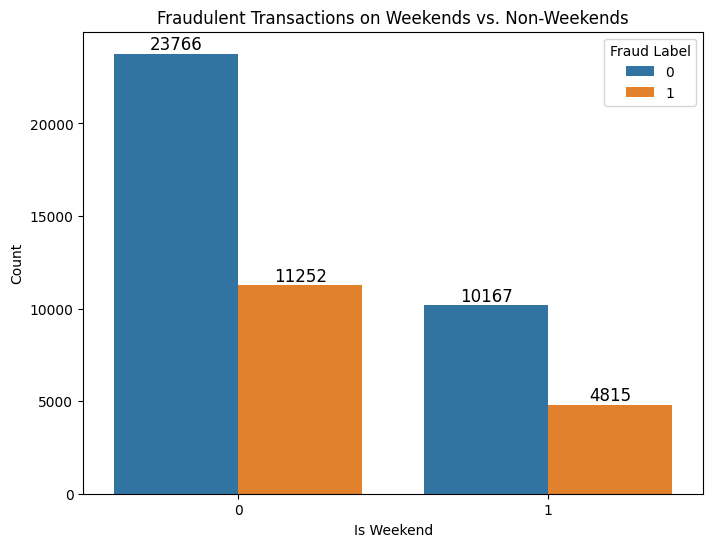

In [11]:
# Checking for the ratio of fraudulent transactions that happened on weekends
def check_weekend_fraud_ratio(df):
    weekend_fraud = df[(df['is_weekend'] == 1) & (df['fraud_label'] == 1)]
    total_fraud = df[df['fraud_label'] == 1]
    ratio = len(weekend_fraud) / len(total_fraud) if len(total_fraud) > 0 else 0
    return ratio
weekend_fraud_ratio = check_weekend_fraud_ratio(df_copy)
print(f"Ratio of fraudulent transactions that happened on weekends: {weekend_fraud_ratio:.2f}")
# Visualizing the ratio of fraudulent transactions that happened on weekends
plt.figure(figsize=(8, 6))
sns.countplot(data=df_copy, x='is_weekend', hue='fraud_label')
plt.title('Fraudulent Transactions on Weekends vs. Non-Weekends')
for container in plt.gca().containers:
    plt.gca().bar_label(container, label_type='edge', fontsize=12, color='black')
plt.xlabel('Is Weekend')
plt.ylabel('Count')
plt.legend(title='Fraud Label', loc='upper right')
plt.show()

### Data Preprocessing

In [12]:
# Encoding categorical features
df2 = df_copy.copy()
cols_to_encode = ['transaction_type', 'device_type', 'location', 'merchant_category', 'card_type', 'authentication_method']
df2 = pd.get_dummies(df2, columns=cols_to_encode, drop_first=True, dtype='int')
df2

,transaction_amount,timestamp,account_balance,ip_address_flag,previous_fraudulent_activity,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_age,transaction_distance,...,merchant_category_Electronics,merchant_category_Groceries,merchant_category_Restaurants,merchant_category_Travel,card_type_Discover,card_type_Mastercard,card_type_Visa,authentication_method_OTP,authentication_method_PIN,authentication_method_Password
0,39.79,2023-08-14 19:30:00,93213.17,0,0,7,437.63,3,65,883.17,...,0,0,0,1,0,0,0,0,0,0
1,1.19,2023-06-07 04:01:00,75725.25,0,0,13,478.76,4,186,2203.36,...,0,0,0,0,0,1,0,0,0,1
2,28.96,2023-06-20 15:25:00,1588.96,0,0,14,50.01,4,226,1909.29,...,0,0,1,0,0,0,1,0,0,0
3,254.32,2023-12-07 00:31:00,76807.20,0,0,8,182.48,4,76,1311.86,...,0,0,0,0,0,0,1,1,0,0
4,31.28,2023-11-11 23:44:00,92354.66,0,1,14,328.69,4,140,966.98,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,2023-01-29 18:38:00,76960.11,0,0,2,389.00,3,98,1537.54,...,0,0,0,0,0,0,0,0,1,0
49996,126.15,2023-05-09 08:55:00,28791.75,0,0,13,434.95,4,93,2555.72,...,0,0,0,0,0,0,1,0,0,0
49997,72.02,2023-01-30 19:32:00,29916.41,0,1,1,369.15,2,114,4686.59,...,0,0,0,0,0,0,1,0,0,0
49998,64.89,2023-03-09 19:47:00,67895.67,0,0,13,242.29,4,72,4886.92,...,1,0,0,0,1,0,0,0,0,0


In [13]:
# Splitting features into dependent and independent variables
X = df2.drop(['timestamp', 'fraud_label'], axis=1)
y = df2['fraud_label']
display(X.shape, y.shape)

# Scaling the independent variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

(50000, 36)

(50000,)

array([[-0.60414677,  1.49231046, -0.22989831, ..., -0.57322409,
        -0.5799984 , -0.57602621],
       [-0.99528513,  0.8842501 , -0.22989831, ..., -0.57322409,
        -0.5799984 ,  1.73603211],
       [-0.71388844, -1.69349153, -0.22989831, ..., -0.57322409,
        -0.5799984 , -0.57602621],
       ...,
       [-0.27755637, -0.70853737, -0.22989831, ..., -0.57322409,
        -0.5799984 , -0.57602621],
       [-0.3498055 ,  0.61201319, -0.22989831, ..., -0.57322409,
        -0.5799984 , -0.57602621],
       [-0.875613  , -1.48209293, -0.22989831, ...,  1.74451846,
        -0.5799984 , -0.57602621]], shape=(50000, 36))

In [14]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 36), (10000, 36), (40000,), (10000,))

### Model Build

In [15]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier()
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 12832, number of negative: 27168
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1733
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.320800 -> initscore=-0.750098
[LightGBM] [Info] Start training from score -0.750098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,4.62
BaggingClassifier,1.00,1.00,1.00,1.00,1.04
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.23
RandomForestClassifier,1.00,1.00,1.00,1.00,6.64
XGBClassifier,1.00,1.00,1.00,1.00,0.76
LGBMClassifier,1.00,1.00,1.00,1.00,0.71
ExtraTreesClassifier,0.99,0.98,0.98,0.99,5.35
SVC,0.97,0.97,0.97,0.97,117.21
GaussianNB,0.89,0.86,0.86,0.89,0.14


In [16]:
# Building the model on one of the top performing models - Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=42)
dtree.fit(X_train, y_train)
dt_pred = dtree.predict(X_test)
dt_pred

array([0, 0, 0, ..., 0, 0, 1], shape=(10000,))

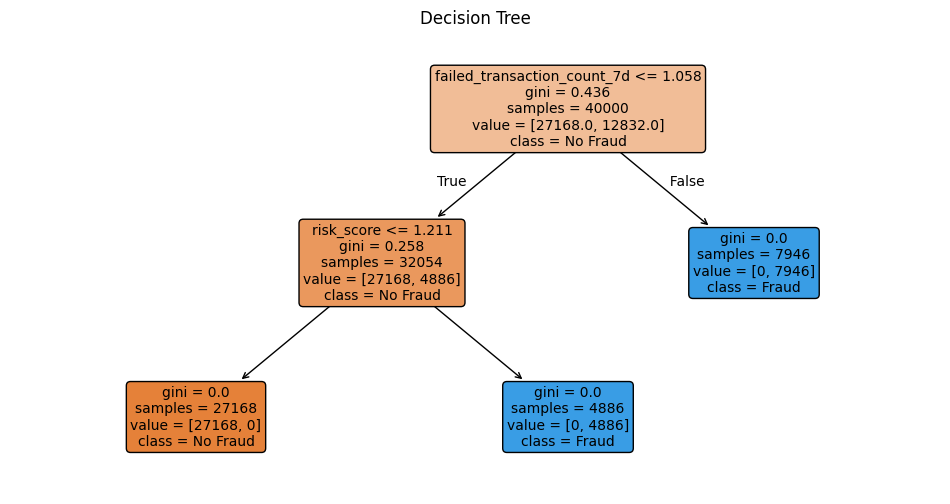

In [17]:
from sklearn.tree import plot_tree
class_ = ['No Fraud', 'Fraud']
plt.figure(figsize=(12,6))
plot_tree(dtree, class_names=class_, feature_names=X.columns, filled=True, fontsize=10, rounded=True)
plt.title('Decision Tree')
plt.show()

Accuracy Score: 1.0
recall score: 1.0
ROC AUC: 1.0
------------------------------------------------------------------------------------------
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6765
           1       1.00      1.00      1.00      3235

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



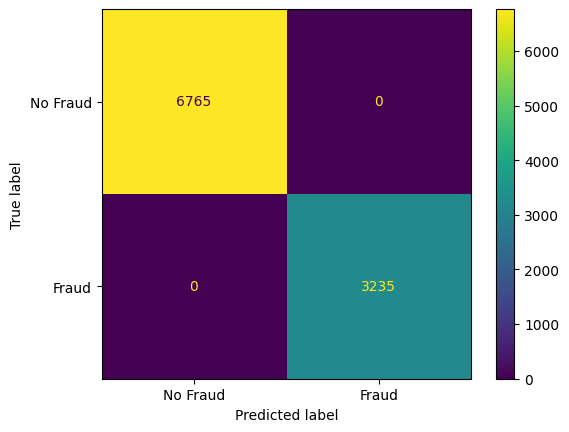

In [18]:
# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
print(f"Accuracy Score: {accuracy_score(y_test, dt_pred)}")
print(f"recall score: {recall_score(y_test, dt_pred)}")
print(f"ROC AUC: {roc_auc_score(y_test, dt_pred)}")
print('---' * 30)
print(f"Classification Report: {classification_report(y_test, dt_pred)}")
cm = confusion_matrix(y_test, dt_pred)
ConfusionMatrixDisplay(cm, display_labels=class_).plot()

#### Feature Importance with Decision Tree Classifier

failed_transaction_count_7d      0.52
risk_score                       0.48
transaction_amount               0.00
account_balance                  0.00
previous_fraudulent_activity     0.00
ip_address_flag                  0.00
avg_transaction_amount_7d        0.00
daily_transaction_count          0.00
card_age                         0.00
transaction_distance             0.00
is_weekend                       0.00
year                             0.00
month                            0.00
day                              0.00
hour                             0.00
minutes                          0.00
second                           0.00
transaction_type_Bank Transfer   0.00
transaction_type_Online          0.00
transaction_type_POS             0.00
device_type_Mobile               0.00
device_type_Tablet               0.00
location_Mumbai                  0.00
location_New York                0.00
location_Sydney                  0.00
location_Tokyo                   0.00
merchant_cat

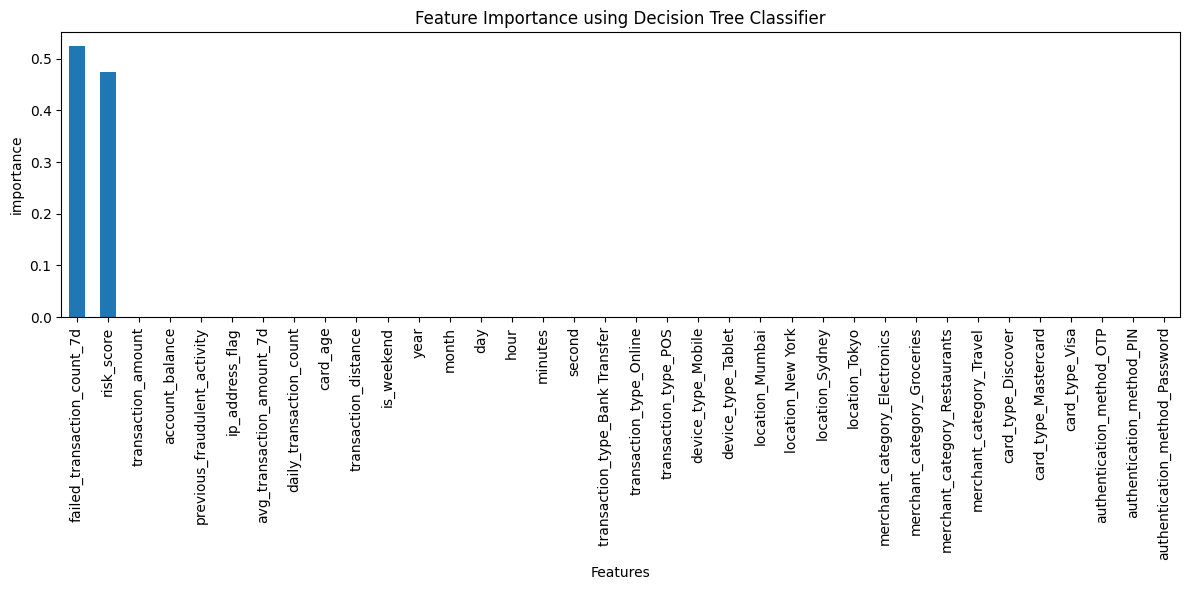

In [19]:
importances = dtree.feature_importances_
feature_columns = X.columns
feature_importance = pd.Series(importances, feature_columns).sort_values(ascending=False)
print(feature_importance)

# Visualizing feature importance
plt.figure(figsize=(12,6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance using Decision Tree Classifier')
plt.xlabel('Features')
plt.ylabel('importance')
plt.tight_layout()
plt.show()

#### Smoting - Output Feature Balancing

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
X_resampled.shape, y_resampled.shape

((67866, 36), (67866,))

In [21]:
# Splitting the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.2)
X_train_resampled.shape, X_test_resampled.shape, y_train_resampled.shape, y_test_resampled.shape

((54292, 36), (13574, 36), (54292,), (13574,))

In [22]:
# Building the model on the resampled data
dtree_resampled = DecisionTreeClassifier(max_depth=3, min_samples_split=2, random_state=42)
dtree_resampled.fit(X_train_resampled, y_train_resampled)
dt_pred_resampled = dtree_resampled.predict(X_test_resampled)
dt_pred_resampled

array([1, 0, 1, ..., 0, 1, 0], shape=(13574,))

Accuracy Score (Resampled): 0.9939590393399146
Recall Score (Resampled): 0.9879765395894429
ROC AUC (Resampled): 0.9939882697947214
------------------------------------------------------------------------------------------
Classification Report (Resampled):               precision    recall  f1-score   support

           0       0.99      1.00      0.99      6754
           1       1.00      0.99      0.99      6820

    accuracy                           0.99     13574
   macro avg       0.99      0.99      0.99     13574
weighted avg       0.99      0.99      0.99     13574



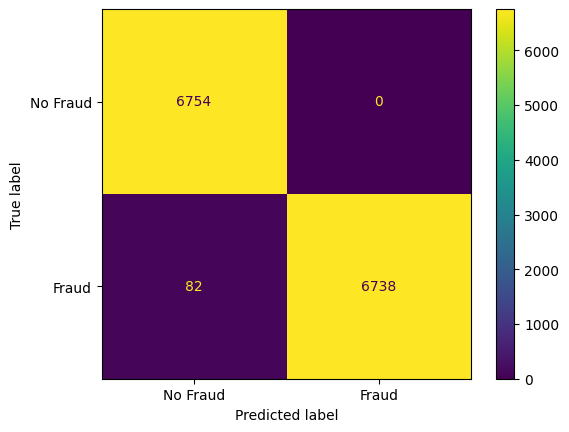

In [23]:
# Evaluating the model on the resampled data
print(f"Accuracy Score (Resampled): {accuracy_score(y_test_resampled, dt_pred_resampled)}")
print(f"Recall Score (Resampled): {recall_score(y_test_resampled, dt_pred_resampled)}")
print(f"ROC AUC (Resampled): {roc_auc_score(y_test_resampled, dt_pred_resampled)}")
print('---' * 30)
print(f"Classification Report (Resampled): {classification_report(y_test_resampled, dt_pred_resampled)}")
cm_resampled = confusion_matrix(y_test_resampled, dt_pred_resampled)
ConfusionMatrixDisplay(cm_resampled, display_labels=class_).plot()

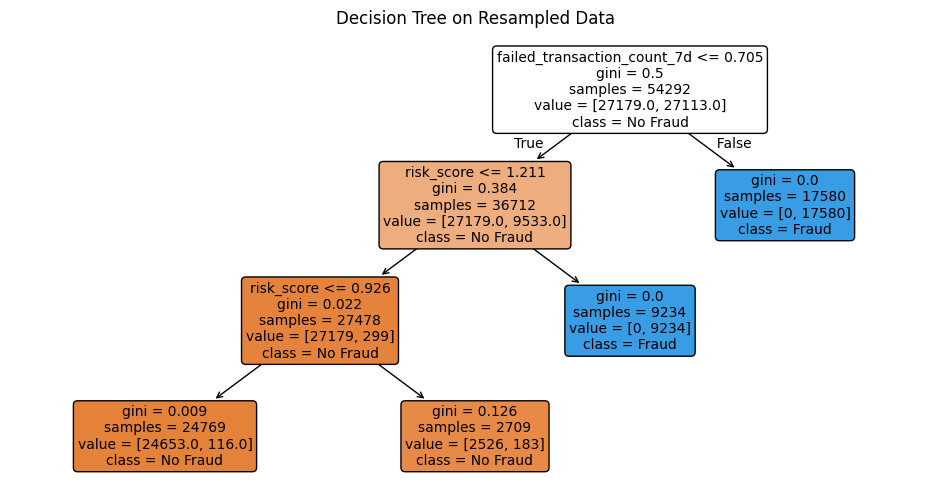

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(dtree_resampled, class_names=class_, feature_names=X.columns, filled=True, fontsize=10, rounded=True)
plt.title('Decision Tree on Resampled Data')
plt.show()